# Dynamic Mapping GLM Data

1. Map Tiles
- OpenStreetMap
- Mapbox Bright
- Mapbox Control Room
- Stamen Terrain
- Stamen Toner
- Stamen Watercolor
- CartoDB positron
- CartoDB dark_matter

In [63]:
# Install libraries
import folium
import geopandas

import pandas as pd

from shapely.geometry import Point

In [77]:
# Declare constants
center = [27.94, -82.4586]
zoom_start=10
base_map = "cartodbdark_matter"

In [78]:
def init_map(center=center, zoom_start=zoom_start, tiles=base_map):
    # Initializes base map
    return folium.Map(location=center, zoom_start=zoom_start, tiles=tiles)

# init_map()

In [79]:
def create_point_map(df):
    # cleaning
    df[['Latitude', 'Longitude']] - df[['Latitude', 'Longitude']].apply(pd.to_numeric, errors='coerce')
    # Convert pandas dataframe to geopandas dataframe
    df['coordinates'] = df[['Latitude', 'Longitude']].values.tolist()
    df['coordinates'] =df['coordinates'].apply(Point)
    df = geopandas.GeoDataFrame(df, geometry='coordinates')
    df = df.dropna(subset=['Latitude', 'Longitude', 'coordinates'])
    return df

def plot_from_df(df, folium_map):
    df = create_point_map(df)
    for i, row in df.iterrows():
        icon = folium.features.CustomIcon(IM_CONSTANTS[row.Icon_ID], icon_size=(row.Icon_Size, row.Icon_Size))
    folium.Marker([row.Latitude, row.Longitude], tooltip=f'{row.ID}', opacity=row.Opacity, icon=icon).add_to(folium_map)
    return folium_map

In [80]:
IM_CONSTANTS = {0: './assets/flash.png',
                1: './assets/light.png',
                2: './assets/lightning.png'}

In [81]:
def load_df():
    data = {
        'ID': ['Beaver', 'B'],
        'Icon_ID': [0, 1],
        'Icon_Size': [50, 40],
        'Opacity': [1, 0.5],
        'Latitude': [27.77, 27.82],
        'Longitude': [-82.39, -82.21]
    }
    df = pd.DataFrame(data)
    return df

In [82]:
df = load_df()
df

,ID,Icon_ID,Icon_Size,Opacity,Latitude,Longitude
0,Raccoon,0,50,1.0,27.77,-82.39
1,A,1,40,0.5,27.82,-82.21


## Display Lightning Map


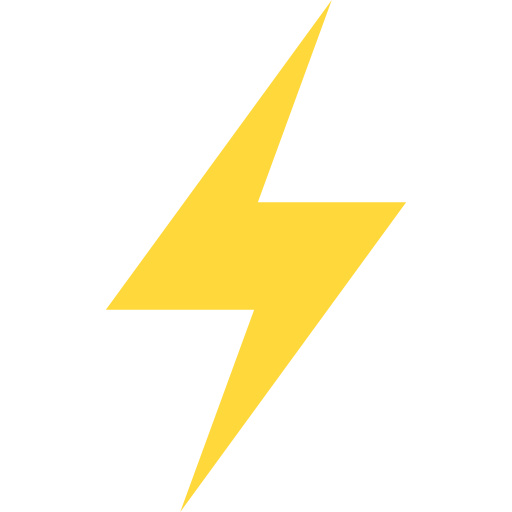

In [85]:
df = load_df()
m = init_map()
m = plot_from_df(df, m)
m